Se importan las librerías pandas, numpy y matplotlib

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se crea un DataFrame con los datos proporcionados

In [10]:
data = { 
    'Pregunta': ['Pregunta 1', 'Pregunta 2', 'Pregunta 3', 'Pregunta 4', 'Pregunta 5'],
    'Clase 1_pp': [17, 17, 5, 17, 16],
    'Clase 1_pn': [0, 0, 12, 0, 1],
    'Clase 2_pp': [16, 17, 17, 17, 17],
    'Clase 2_pn': [1, 0, 0, 0, 0],
    'Clase 3_pp': [17, 15, 9, 17, 17],
    'Clase 3_pn': [0, 2, 8, 0, 0],
    'Clase 4_pp': [16, 16, 15, 16, 15],
    'Clase 4_pn': [0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)  # Convierte los datos en una tabla para manejarlos fácilmente

Filtra columnas por patrón en los nombres

In [11]:
pp_columns = df.filter(like='_pp')
pn_columns = df.filter(like='_pn')

Cálculo de estadísticas: media / desviación estandar / acumulado

In [12]:
df['Media_pp'] = pp_columns.mean(axis=1)
df['Media_pn'] = pn_columns.mean(axis=1)
df['Desviacion_pp'] = pp_columns.std(axis=1, ddof=0)
df['Desviacion_pn'] = pn_columns.std(axis=1, ddof=0)
df['Acumulado_pp'] = pp_columns.sum(axis=1)
df['Acumulado_pn'] = pn_columns.sum(axis=1)
df.head()

,Pregunta,Clase 1_pp,Clase 1_pn,Clase 2_pp,Clase 2_pn,Clase 3_pp,Clase 3_pn,Clase 4_pp,Clase 4_pn,Media_pp,Media_pn,Desviacion_pp,Desviacion_pn,Acumulado_pp,Acumulado_pn
0,Pregunta 1,17,0,16,1,17,0,16,0,16.50,0.25,0.577350,0.500000,66,1
1,Pregunta 2,17,0,17,0,15,2,16,0,16.25,0.50,0.957427,1.000000,65,2
2,Pregunta 3,5,12,17,0,9,8,15,1,11.50,5.25,5.507571,5.737305,46,21
3,Pregunta 4,17,0,17,0,17,0,16,0,16.75,0.00,0.500000,0.000000,67,0
4,Pregunta 5,16,1,17,0,17,0,15,1,16.25,0.50,0.957427,0.577350,65,2


Se crea el gráfico

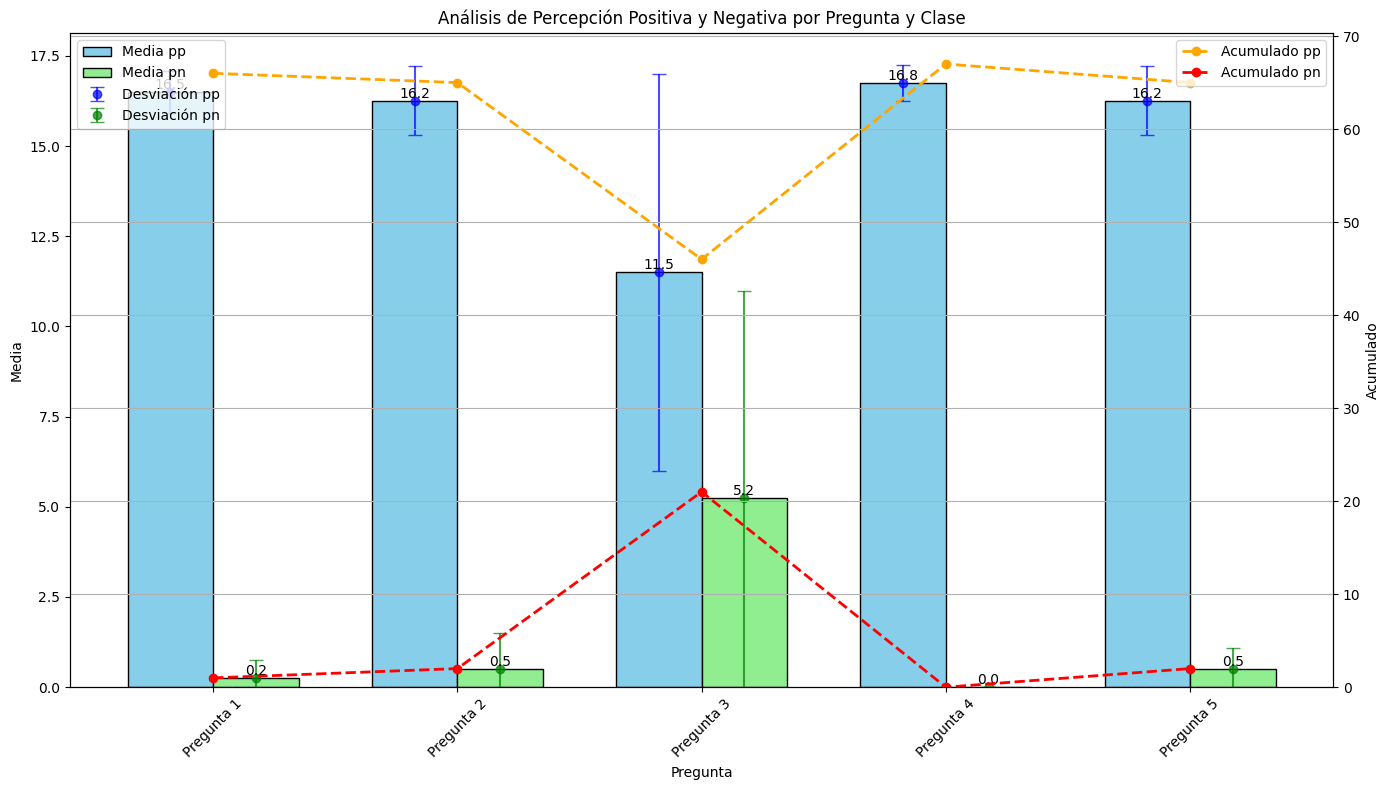

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

# Ajuste el ancho de las barras
bar_width = 0.35
index = np.arange(len(df))

# Grafica la media con barras
bars_pp = ax.bar(index - bar_width / 2, df['Media_pp'], bar_width, label='Media pp', color='skyblue', edgecolor='black')
bars_pn = ax.bar(index + bar_width / 2, df['Media_pn'], bar_width, label='Media pn', color='lightgreen', edgecolor='black')

# Agrega etiquetas a las barras
for bar in bars_pp:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', va='bottom', ha='center', color='black')
for bar in bars_pn:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', va='bottom', ha='center', color='black')

# Grafica la desviación estándar como líneas de error
ax.errorbar(index - bar_width / 2, df['Media_pp'], yerr=df['Desviacion_pp'], fmt='o', color='blue', capsize=5, linestyle='None', label='Desviación pp', alpha=0.7)
ax.errorbar(index + bar_width / 2, df['Media_pn'], yerr=df['Desviacion_pn'], fmt='o', color='green', capsize=5, linestyle='None', label='Desviación pn', alpha=0.7)

# Grafica acumulado en un gráfico de líneas
ax2 = ax.twinx()
line1, = ax2.plot(df['Pregunta'], df['Acumulado_pp'], marker='o', linestyle='--', color='Orange', label='Acumulado pp', linewidth=2)
line2, = ax2.plot(df['Pregunta'], df['Acumulado_pn'], marker='o', linestyle='--', color='red', label='Acumulado pn', linewidth=2)

# Configura etiquetas y título del gráfico
ax.set_xlabel('Pregunta')
ax.set_ylabel('Media')
ax2.set_ylabel('Acumulado')
ax.set_title('Análisis de Percepción Positiva y Negativa por Pregunta y Clase')
ax.set_xticks(index)
ax.set_xticklabels(df['Pregunta'], rotation=45)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajusta los límites del eje y para eliminar espacio extra
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Ajusta el diseño para que no se sobrepongan los elementos y crea grilla
plt.grid(True)
plt.tight_layout()
plt.show()